In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df =pd.read_csv('https://raw.githubusercontent.com/wan6570/FlyAI_Project/main/Data/ProcessedData/LCK_2023_SUMMER_DROP_NAN.csv')

In [2]:
df.head()

,Player,Champion,Role,Level,Kills,Deaths,Assists,KDA,CS,CS in Jungle,...,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost,Version,Date,Team,Result
0,Kiin,Gangplank,TOP,16,2,1,8,10,252,4,...,13570,42,7,22,0,100,13.14,8/6/2023,KT,Win
1,Cuzz,Viego,JUNGLE,15,8,2,10,9,182,156,...,23779,66,5,24,0,150,13.14,8/6/2023,KT,Win
2,Bdd,Ahri,MID,15,7,3,10,5.7,219,0,...,16177,114,7,23,100,500,13.14,8/6/2023,KT,Win
3,Aiming,Tristana,ADC,15,0,2,13,6.5,264,12,...,9404,33,6,23,0,0,13.14,8/6/2023,KT,Win
4,Lehends,Alistar,SUPPORT,12,2,3,11,4.3,30,0,...,11572,49,16,27,0,0,13.14,8/6/2023,KT,Win


In [3]:
df['XPD@15']

0        122
1        197
2      -1353
3       -170
4        518
        ... 
2045    1053
2046     120
2047     455
2048     405
2049   -1379
Name: XPD@15, Length: 2050, dtype: int64

In [12]:
jungle_df = df[df['Role'] == 'JUNGLE']

In [11]:
# Group by "Player" and "Champion" and count the occurrences
most_played_champion = df.groupby(['Player', 'Champion']).size().reset_index(name='Count')

# Sort by count and drop duplicates to keep only the most played champion for each player
most_played_champion = most_played_champion.sort_values(['Player', 'Count'], ascending=[True, False]).drop_duplicates(subset='Player')

# Reset index and drop unnecessary columns
most_played_champion = most_played_champion[['Player', 'Champion']].reset_index(drop=True)

most_played_champion


,Player,Champion
0,Aiming,Kai'Sa
1,Andil,Braum
2,Bdd,Azir
3,BeryL,Rell
4,Bible,Rell
...,...,...
61,Willer,Sejuani
62,YoungJae,Sejuani
63,Zeka,Azir
64,Zeus,Gragas


In [6]:
# Filter players who have participated in more than 25 games
player_counts = df['Player'].value_counts()
players_to_keep = player_counts[player_counts > 20].index
df_filtered = df[df['Player'].isin(players_to_keep)]

# Split the dataframe based on the "Role" column
role_groups = df_filtered.groupby('Role')
role_dfs = {role: role_group for role, role_group in role_groups}

# Adjust XPD@15 for each role so that its minimum value is 50
adjustments = {role: 50 - df['XPD@15'].min() for role, df in role_dfs.items()}
for role, adjustment in adjustments.items():
    role_dfs[role]['XPD@15'] += adjustment

# Function to normalize stats for each role
def normalize_role_stats(role_df):
    role_avg_stats = role_df[['GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']].mean()
    player_avg_stats = role_df.groupby('Player')[['GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']].mean()
    normalized_stats = player_avg_stats / role_avg_stats
    return normalized_stats

# Calculate normalized stats for each role
normalized_stats_adjusted = {role: normalize_role_stats(df[df['Result'] == 'Win']) for role, df in role_dfs.items()}

In [7]:
top_df = role_dfs['TOP']

top_df[['GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']].describe()

,GPM,VSPM,DPM,KP%,XPD@15
count,393.000000,393.00000,393.000000,393.000000,393.000000
mean,389.816794,1.05229,484.068702,0.538092,2426.496183
std,56.292531,0.24433,167.536496,0.234123,739.511056
min,282.000000,0.50000,129.000000,0.000000,50.000000
25%,346.000000,0.89000,364.000000,0.400000,1947.000000
50%,386.000000,1.05000,457.000000,0.545000,2440.000000
75%,425.000000,1.19000,585.000000,0.700000,2903.000000
max,571.000000,1.96000,1081.000000,1.000000,4814.000000


In [17]:
normalized_stats_adjusted['JUNGLE']

,GPM,VSPM,DPM,KP%,XPD@15
Player,,,,,
Canyon,1.012169,0.945472,1.084149,0.997857,1.182665
Croco,0.969128,1.034072,1.083982,1.123366,0.830934
Cuzz,1.003547,1.019661,0.970666,1.046786,1.003632
Grizzly,1.000388,0.802759,1.019315,0.979737,1.002232
Oner,1.020449,0.976308,1.041259,1.015273,0.952773
Peanut,1.025988,0.999769,1.053418,0.943706,1.051091
Sylvie,0.992562,1.252304,0.865191,0.844988,0.922670
UmTi,0.962087,0.986858,0.896591,1.081309,0.978669
Willer,1.002994,1.067223,0.894436,1.021125,0.975429


In [15]:
role_dfs['JUNGLE'].head()

,Player,Champion,Role,Level,Kills,Deaths,Assists,KDA,CS,CS in Jungle,...,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost,Version,Date,Team,Result
1,Cuzz,Viego,JUNGLE,15,8,2,10,9,182,156,...,23779,66,5,24,0,150,13.14,8/6/2023,KT,Win
6,Willer,Nocturne,JUNGLE,13,2,3,4,2,164,158,...,26170,41,12,26,0,0,13.14,8/6/2023,LSB,Lose
11,Willer,Wukong,JUNGLE,15,3,4,3,1.5,196,183,...,28258,127,22,37,450,200,13.14,8/6/2023,LSB,Lose
21,Croco,Zac,JUNGLE,15,5,1,15,20,145,120,...,30045,16,7,23,0,0,13.14,8/6/2023,DRX,Win
26,YoungJae,Maokai,JUNGLE,12,1,6,3,0.7,123,100,...,31373,168,14,28,0,0,13.14,8/6/2023,KDF,Lose


In [8]:
combined_df = pd.concat(normalized_stats_adjusted).reset_index()
combined_df.columns = ['Role', 'Player', 'GPM', 'VSPM', 'DPM', 'KP%', 'XPD@15']

#combined_df.to_csv('FiveFeatures.csv', index=True)

In [12]:
combined_df_with_champion = combined_df.merge(most_played_champion, on='Player', how='left')

In [14]:
combined_df_with_champion.to_csv('FiveFeaturesWithChampion.csv')

In [17]:
for role in normalized_stats_adjusted.keys():
    temp = pd.DataFrame(normalized_stats_adjusted[role])
    temp.to_csv(f'{role}_FiveFeatures.csv')


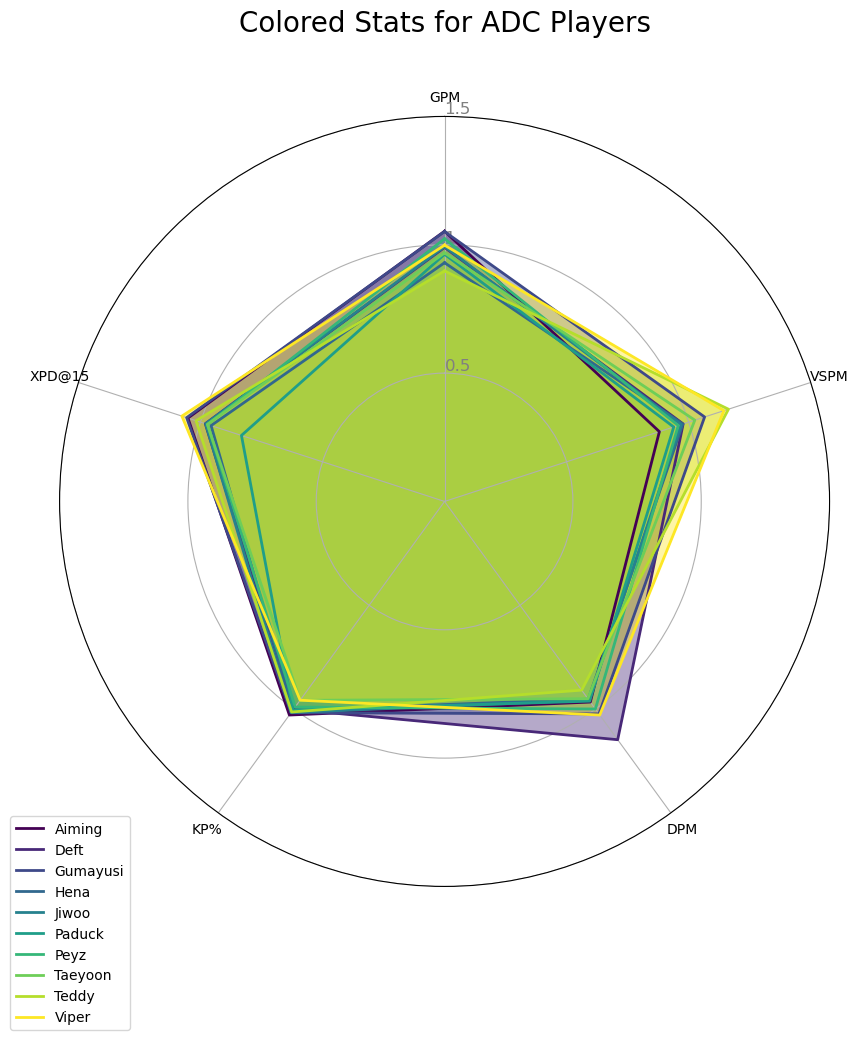

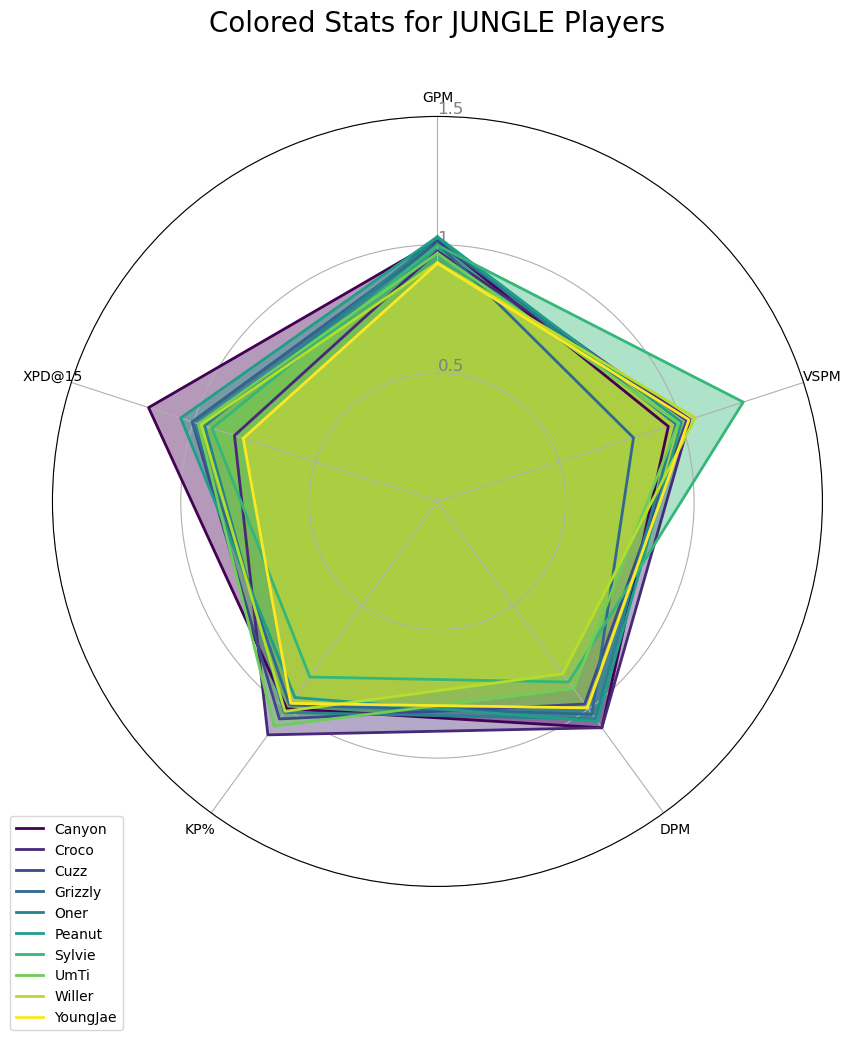

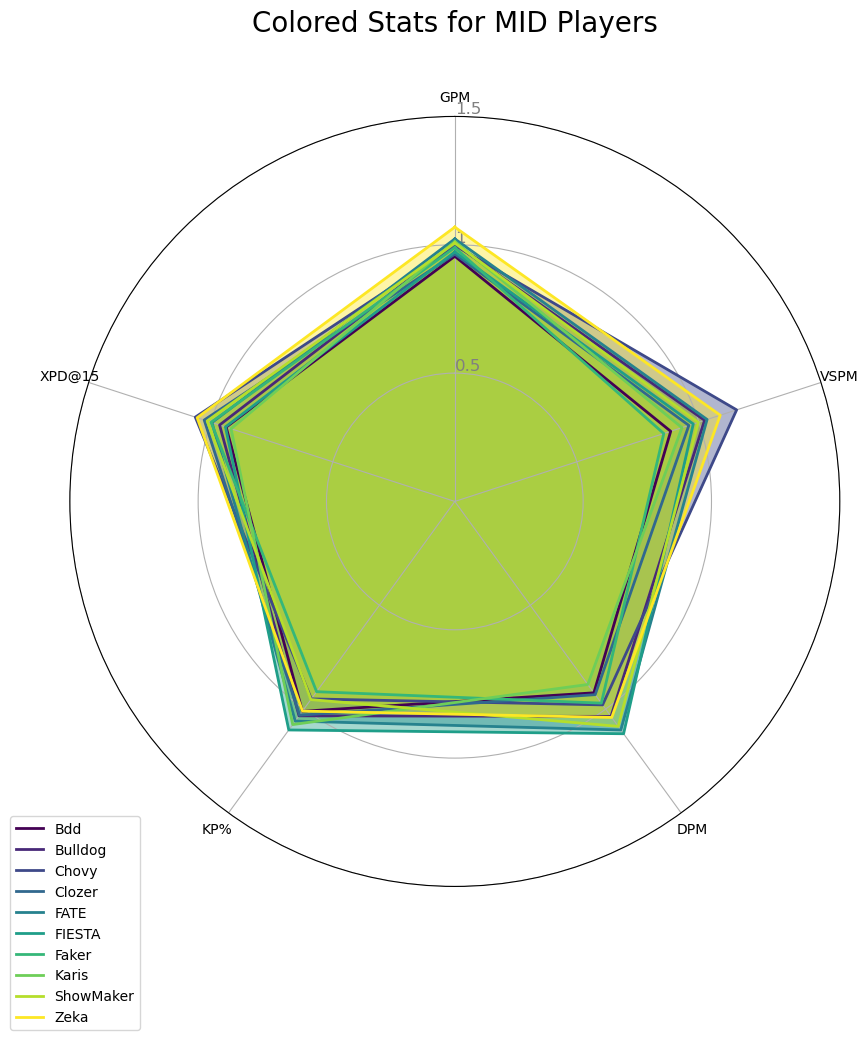

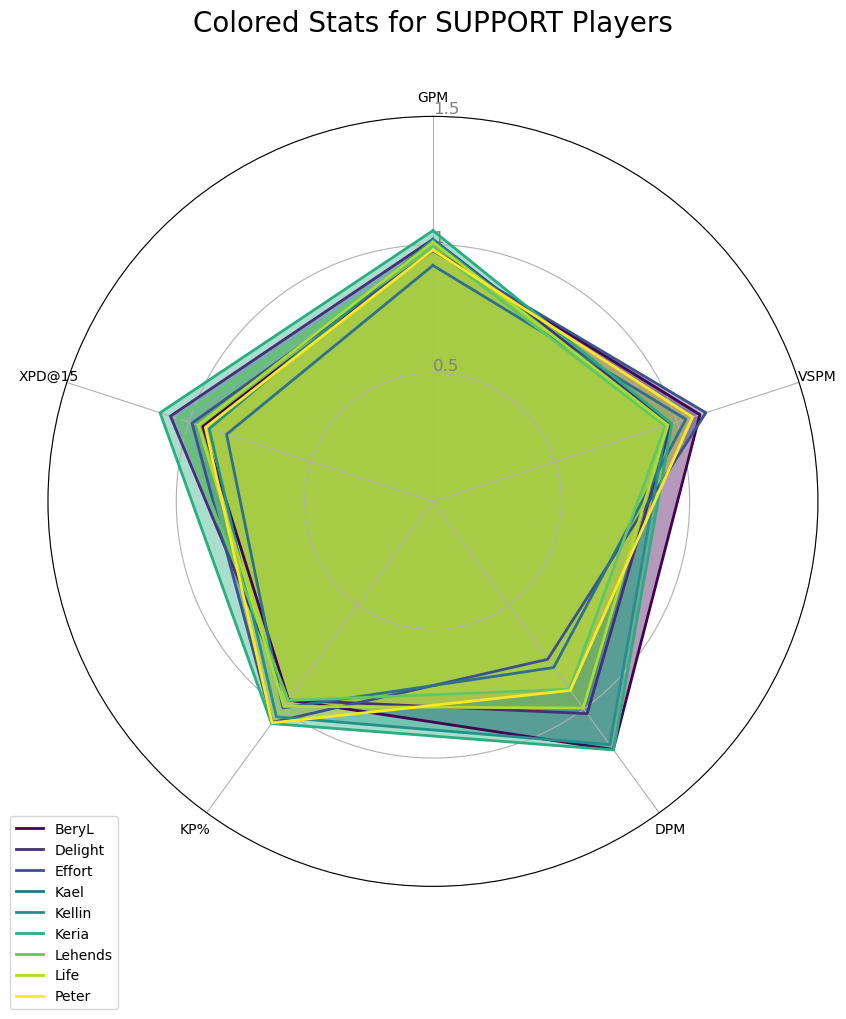

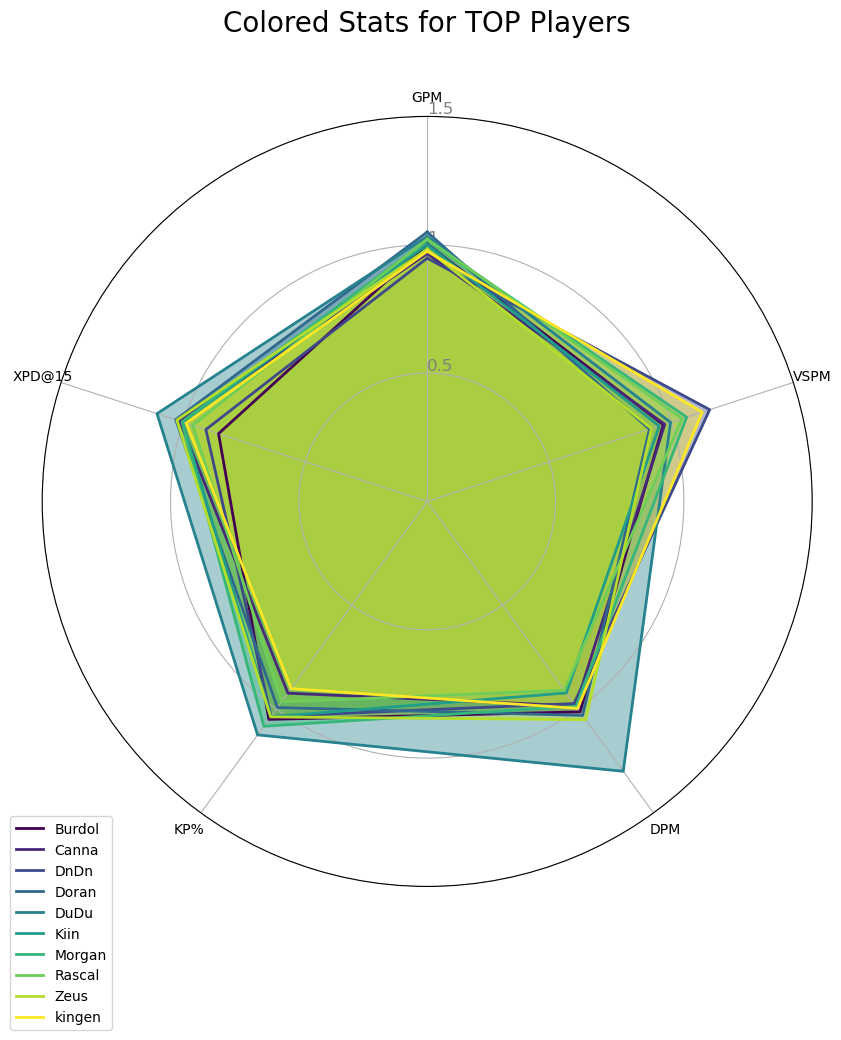

In [12]:
# Function to plot radar chart for the stats
def plot_colored_radar(data, title=""):
    categories = list(data)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.5, 1, 1.5], ["0.5", "1", "1.5"], color="grey", size=12)
    plt.ylim(0, 1.5)
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
    for i, (player, row) in enumerate(data.iterrows()):
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player, color=colors[i])
        ax.fill(angles, values, color=colors[i], alpha=0.4)
    plt.title(title, size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Plot the radar chart for all roles
for role, stats in normalized_stats_adjusted.items():
    plot_colored_radar(stats, title=f"Colored Stats for {role} Players")